### Alberto Bermejo DÍez
### 000444772
### Travail numérique de PHYS-F303


In [106]:
from matplotlib import pyplot
import numpy
import scipy
from scipy import special
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

# 06_02_random_numbers

In [47]:
# We draw ten random numbers
x = numpy.random.random_sample(10)
print(x)

[0.20523455 0.177205   0.32310057 0.48939675 0.69514589 0.82037293
 0.97354605 0.65147802 0.03918612 0.17433223]


In [48]:
numpy.random.seed(0)
x = numpy.random.random_sample(10)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


In [109]:
numpy.random.seed(0)
x = numpy.random.random_sample(5)
print(x)
x = numpy.random.random_sample(5)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]


### Question 1: Comparaison entre ces 2 listes et la liste antérieure?
#### Réponse 1: Dû à que la seed=0 les nombres générées sont les mêmes, même si les nombres générées sont séparés dans plusieurs listes. Or, si la seed change les nombres générées varient aussi.

In [50]:
a=5
b=20
x = numpy.random.random_sample(100000000)
y = (b-a)*x+a
print(y)

[16.87587557 12.9334238  13.52066842 ... 12.9920066  19.78411948
 11.11259647]


C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


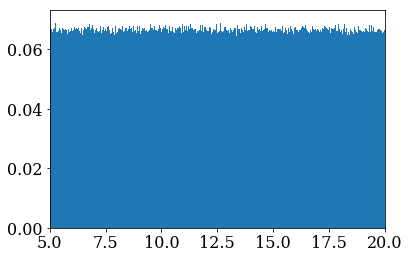

In [51]:
binwidth=0.001
pyplot.xlim(5,20)
pyplot.hist(y,bins=numpy.arange(5.,21., binwidth),normed=True);

### Question 2: Lorsque la taille de l'échantillon des nombres random augment et la taille des bins diminue, la fréquence converge vers la fonction de distribution de probabilité des nombres aléatoires. Fonctione-t-elle? 
#### Réponse 2: Oui, comme c'est visible par l'histogramme ci-dessus, l'histogramme tend vers une ligne droite qui représente le graphe de la fonction d'une distribution uniforme dans une intervalle.

C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


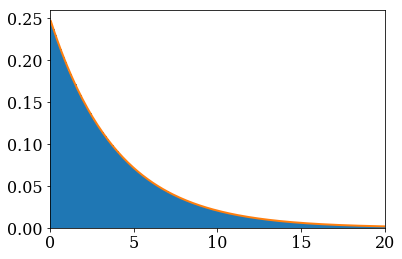

In [52]:
alpha = 0.25 # rate of the exponential distribution
x = numpy.random.random_sample(10000000)
y = -1/alpha*numpy.log(1-x)

# Plots
binwidth=0.1
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


### Question 3: Production d'un générateur aléatoire à partir de l'inverse de la fonction cumulatrice sur [0,1]?
#### Réponse 4: Oui, ça fonctionne, lorsque la taille des bins baisse et la taille de l'échantillon des nombres aléatoires augment l'histogramme s'approche à la fonction exponentielle.

## Challenge

### 1) Python has many built-in random number generators. Check-out the documentation and try a couple of ones. In particular, compare the output of the built-in expontential and Gaussian generators with the versions implemented above.


In [53]:
numpy.random.normal()


0.028218990474521463

C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


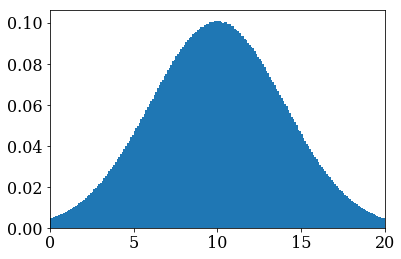

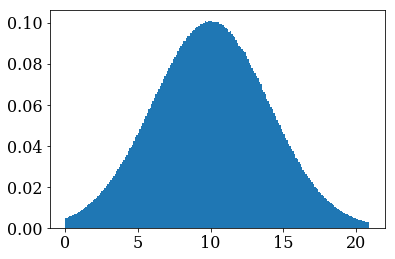

In [54]:
mu = 10
sigma = 4
x_gauss = numpy.random.random_sample(10000000)
y_gauss = (2**0.5) * sigma * (scipy.special.erfinv(2*x_gauss -1))+ mu
 
# Plots
binwidth=0.1
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
gauss_1 = pyplot.hist(y_gauss,bins,normed=True)
pyplot.show(gauss_1)

y_gauss_1 = numpy.random.normal(mu, sigma,10000000)
gauss_2 = pyplot.hist(y_gauss_1,bins,normed=True)

pyplot.show(gauss_2)

C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


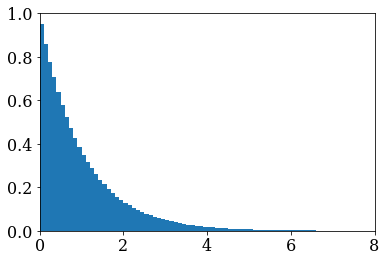

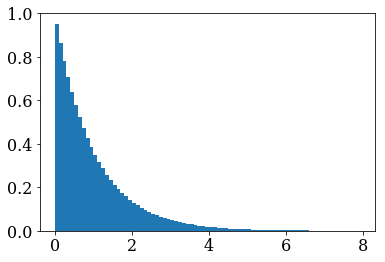

In [55]:
alpha = 1 # rate of the exponential distribution
x_exp = numpy.random.random_sample(10000000)
y_exp = (-1/alpha) * numpy.log(1-x)

# Plots
binwidth=0.1
pyplot.xlim(0,8)
bins=numpy.arange(0.,8., binwidth)
exp_1 = pyplot.hist(y_exp,bins,normed=True)
pyplot.show(exp_1)

y_exp_1 = numpy.random.exponential(alpha,10000000)
exp_2 = pyplot.hist(y_exp_1,bins,normed=True)

pyplot.show(exp_2)

### 2) Another popular method to generate numbers according to the Gaussian distribution is known as the Box–Muller algorithm. Look up its definition on the web, try to implement it and verify that it works as expected.

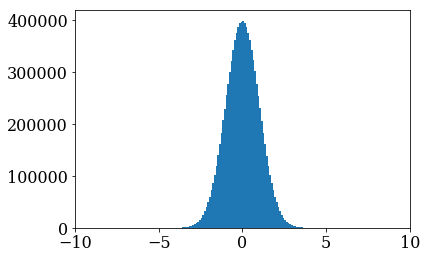

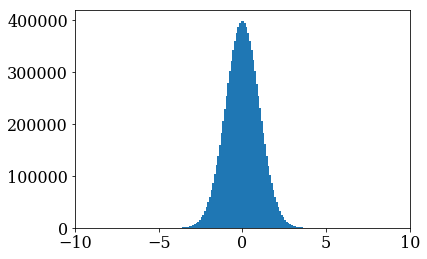

In [56]:

# transformation function
def gaussian(u1,u2):
  z1 = numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*numpy.pi*u2)
  z2 = numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*numpy.pi*u2)
  return z1,z2

# uniformly distributed values between 0 and 1
u1 = numpy.random.rand(10000000)
u2 = numpy.random.rand(10000000)

# run the transformation
z1,z2 = gaussian(u1,u2)
pyplot.xlim(-10,10)
bins=numpy.arange(-10.,10., binwidth)
gauss_3 = pyplot.hist(z1,bins)     # the histograms of z1 and z2
pyplot.show(gauss_3)
pyplot.xlim(-10,10)
gauss_4 = pyplot.hist(z2,bins)
pyplot.show(gauss_4)

# 06_03_BrownianMotion_2

### Challenge

##   1.  Add as systematic contribution to the displacement $dx$,

### $$ dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)} $$

### where $c$ is a constant and analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

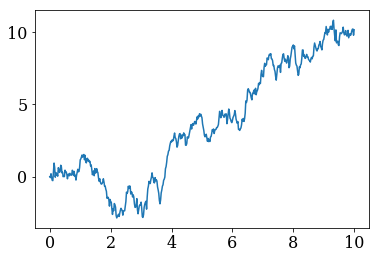

In [57]:
# Total simulation time
T=10.0

# Number of time steps and time interval dt
nt=500
dt=T/nt

# Diffusion coefficient
alpha=2.0
c=1

# Particle positions and initial condition
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0
# Time integration (note the use of the numpy.random.normal function)
for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1) + c * dt

pyplot.plot(t,x)


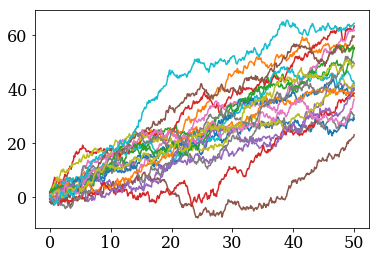

In [58]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000
T=50.0
nt=500
dt=T/nt
alpha=2.0
# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)+ c* dt
    
for i in range(20):
    pyplot.plot(t,x[:,i])

C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


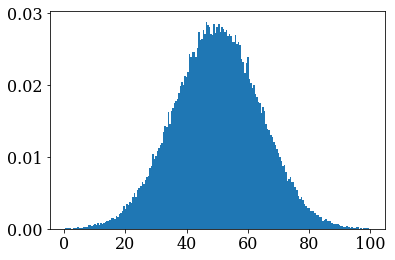

In [59]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(0,100,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);


### Analyse the behaviour of the random walk. Can you guess the corresponding equation governing the evolution of the density in this case? What is the analitical solution for an initial Gaussian distribution?

#### Les particules ont suivi des trajectoires aléatoires mais l’évolution de leur densité, une distribution gaussiene, est la même que si elle était calculée en utilisant l’équation de diffusion.


###    2.  Simulate the following random walk with a 'friction' term:

### $$ dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)} $$
### Check that the distribution reaches a steady state for $t→∞$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? These last two questions are not easy!

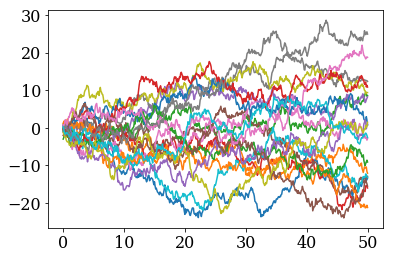

In [60]:
# Generate a set of initial positions based on the Gaussian distribution
npart=100000
T=50.0
nt=500
dt=T/nt
alpha=2.0
gamma = 0.01
# We set mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)- gamma * x[i] * dt
    
for i in range(20):
    pyplot.plot(t,x[:,i])

C:\Users\Alberto Bermejo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


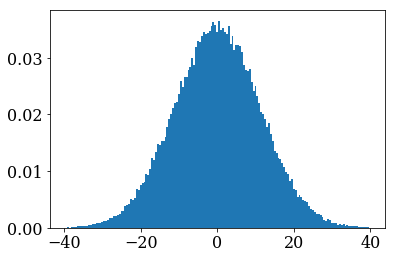

In [62]:
# Generate bins centered around 0
binwidth=0.5
bins=numpy.arange(-40,40,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
pyplot.hist(x[nt],bins,normed=True);


### Analyse the behaviour of the random walk.Check that the distribution reaches a steady state for $t→∞$. Can you guess the corresponding equation governing the evolution of the density in this case? What is analytical form for the steady state? 

#### Les particules ont suivi des trajectoires aléatoires mais l’évolution de leur densité, une distribution gaussiene, est la même que si elle était calculée en utilisant l’équation de diffusion.

# 06_04_Ising_Model

In [63]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

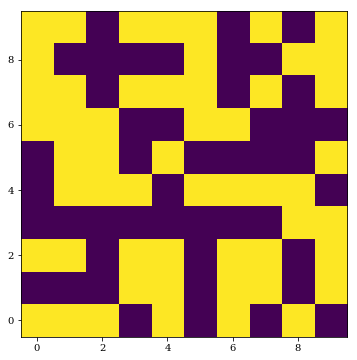

In [64]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

# Initial spins at each site
sp = numpy.load('initial_state.npy')

pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

In [65]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [66]:
print(energy_at_site(sp,alpha,-1,5,5))

0.2


In [67]:
print(energy_at_site(sp,alpha,1,5,5))

-0.2


In [68]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [69]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

1.4912805181863478


In [70]:
print(sp[5,5])

-1


### Challenge: 

####   Check that this is not a coincidence and that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations.

In [71]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.randint(0,2,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [103]:
nx = 100
ny = 100
r_1 = initial_state(nx,ny)

In [73]:
print(energy_at_site(r_1,alpha,1,5,5))

-0.2


In [74]:
print(energy_at_site(r_1,alpha,-1,5,5))

0.2


In [75]:
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

1.4958195023335912


In [76]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny])

In [77]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    """ Creates a sequence of states for the Ising model using
    the Metropolis algorithm
   
    Parameters:
    ----------
    sp   : initial lattice state
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
    NMC  : int
        Number of states to create
    alpha  : real
        coupling constant J/(kb*T)
    Returns:
    -------
    states: sequence of states
    """
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

In [102]:
NMC=100
alpha=0.2

states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [79]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [80]:
fig = pyplot.figure(figsize=(6,3))

pyplot.subplot(1, 2, 1)
img1 = pyplot.imshow(states_0_2[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

pyplot.subplot(1, 2, 2)
img2 = pyplot.imshow(states_0_7[0],interpolation="none",origin='lower',\
                     vmin=-1, vmax=1)

# Animate
def animate(i):
    img1.set_array(states_0_2[i])
    img2.set_array(states_0_7[i])

anim = animation.FuncAnimation(fig, animate, frames=NMC, interval=200)
pyplot.close()
HTML(anim.to_html5_video())



#### We see that for α=0.2, the spins remain disorganised while for α=0.7 the system remains nearly completely magnetized. Does this make sense according to the theory we have outlined at the beginning of the notebook? 

#### Ici, la température du système est plus petite que celle nécessaire pour que le phénomène de la transtion de Curie aille lieu, où les spins s'annullent entre eux. Si α augment, la température du système diminue, et donc l'énergie de vibration des atomes devient plus petit, alors, les propriétés ferromagnétiques du matériau retournent tel que les spins s'alignent.

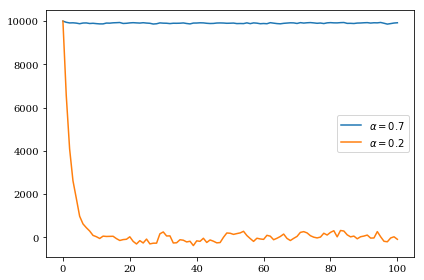

In [81]:
pyplot.figure()
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.legend()
pyplot.tight_layout()

## Challenge

###  1.  Perform a series of runs with α∈[01] and plot the average energy of the system and its magnetisation as a function of α. Estimate the critical value of α at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?

In [82]:
alpha1=0.1
sp1 = numpy.ones([nx,ny])
states_0_1 = ising_model_metropolis(sp1, NMC, nx, ny, alpha1)
M1 = states_0_1.sum(axis=(1,2))
alpha2=0.2
sp2 = numpy.ones([nx,ny])
states_0_2 = ising_model_metropolis(sp2, NMC, nx, ny, alpha2)
M2 = states_0_2.sum(axis=(1,2))
alpha3=0.3
sp3 = numpy.ones([nx,ny])
states_0_3 = ising_model_metropolis(sp3, NMC, nx, ny, alpha3)
M3 = states_0_3.sum(axis=(1,2))
alpha4=0.4
sp4 = numpy.ones([nx,ny])
states_0_4 = ising_model_metropolis(sp4, NMC, nx, ny, alpha4)
M4 = states_0_4.sum(axis=(1,2))
alpha5=0.5
sp5 = numpy.ones([nx,ny])
states_0_5 = ising_model_metropolis(sp5, NMC, nx, ny, alpha5)
M5 = states_0_5.sum(axis=(1,2))
alpha6=0.6
sp6 = numpy.ones([nx,ny])
states_0_6 = ising_model_metropolis(sp6, NMC, nx, ny, alpha6)
M6 = states_0_6.sum(axis=(1,2))
alpha7=0.7
sp7 = numpy.ones([nx,ny])
states_0_7 = ising_model_metropolis(sp7, NMC, nx, ny, alpha7)
M7 = states_0_7.sum(axis=(1,2))
alpha8=0.8
sp8 = numpy.ones([nx,ny])
states_0_8 = ising_model_metropolis(sp8, NMC, nx, ny, alpha8)
M8 = states_0_8.sum(axis=(1,2))
alpha9=0.9
sp9 = numpy.ones([nx,ny])
states_0_9 = ising_model_metropolis(sp9, NMC, nx, ny, alpha9)
M9 = states_0_9.sum(axis=(1,2))
alpha10=1.0
sp10 = numpy.ones([nx,ny])
states_0_10 = ising_model_metropolis(sp10, NMC, nx, ny, alpha10)
M10 = states_0_10.sum(axis=(1,2))

In [83]:
alpha15=0.15
sp15 = numpy.ones([nx,ny])
states_0_15 = ising_model_metropolis(sp15, NMC, nx, ny, alpha15)
M15 = states_0_15.sum(axis=(1,2))
alpha25=0.25
sp25 = numpy.ones([nx,ny])
states_0_25 = ising_model_metropolis(sp25, NMC, nx, ny, alpha25)
M25 = states_0_25.sum(axis=(1,2))
alpha35=0.35
sp35 = numpy.ones([nx,ny])
states_0_35 = ising_model_metropolis(sp35, NMC, nx, ny, alpha35)
M35 = states_0_35.sum(axis=(1,2))
alpha45=0.45
sp45 = numpy.ones([nx,ny])
states_0_45 = ising_model_metropolis(sp45, NMC, nx, ny, alpha45)
M45 = states_0_45.sum(axis=(1,2))
alpha55=0.55
sp55 = numpy.ones([nx,ny])
states_0_55 = ising_model_metropolis(sp55, NMC, nx, ny, alpha55)
M55 = states_0_55.sum(axis=(1,2))
alpha65=0.65
sp65 = numpy.ones([nx,ny])
states_0_65 = ising_model_metropolis(sp65, NMC, nx, ny, alpha65)
M65 = states_0_65.sum(axis=(1,2))
alpha75=0.75
sp75 = numpy.ones([nx,ny])
states_0_75 = ising_model_metropolis(sp75, NMC, nx, ny, alpha75)
M75 = states_0_75.sum(axis=(1,2))
alpha85=0.85
sp85 = numpy.ones([nx,ny])
states_0_85 = ising_model_metropolis(sp85, NMC, nx, ny, alpha85)
M85 = states_0_85.sum(axis=(1,2))
alpha95=0.95
sp95 = numpy.ones([nx,ny])
states_0_95 = ising_model_metropolis(sp95, NMC, nx, ny, alpha95)
M95 = states_0_95.sum(axis=(1,2))
alpha05=0.05
sp05 = numpy.ones([nx,ny])
states_0_05 = ising_model_metropolis(sp05, NMC, nx, ny, alpha05)
M05 = states_0_05.sum(axis=(1,2))

## Magnétisation en fonction de alpha

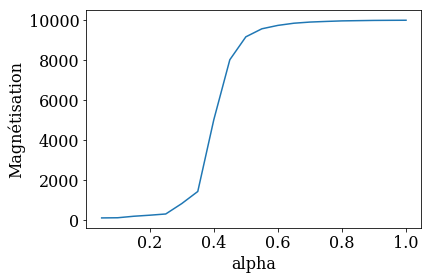

In [108]:
a = [numpy.mean(M05),numpy.mean(M1),numpy.mean(M15),numpy.mean(M2),numpy.mean(M25),numpy.mean(M3),numpy.mean(M35),numpy.mean(M4),numpy.mean(M45),numpy.mean(M5),numpy.mean(M55),numpy.mean(M6),numpy.mean(M65),numpy.mean(M7),numpy.mean(M75),numpy.mean(M8),numpy.mean(M85),numpy.mean(M9),numpy.mean(M95),numpy.mean(M10)]
c=numpy.arange(0.05,1.05, 0.05)
fig = pyplot.figure()
ax=fig.add_subplot(111)
ax.set_xlabel('alpha')
ax.set_ylabel('Magnétisation')
pyplot.plot(c,a)

In [85]:
S1 = states_0_1.sum(axis=(1,0))
energy1 = 2 * alpha1 * S1 * M1[1:]
S2 = states_0_2.sum(axis=(1,0))
energy2 = 2 * alpha2 * S2 * M2[1:]
S3 = states_0_3.sum(axis=(1,0))
energy3 = 2 * alpha3 * S3 * M3[1:]
S4 = states_0_4.sum(axis=(1,0))
energy4 = 2 * alpha4 * S4 * M4[1:]
S5 = states_0_5.sum(axis=(1,0))
energy5 = 2 * alpha5 * S5 * M5[1:]
S6 = states_0_6.sum(axis=(1,0))
energy6 = 2 * alpha6 * S6 * M6[1:]
S7 = states_0_7.sum(axis=(1,0))
energy7 = 2 * alpha7 * S7 * M7[1:]
S8 = states_0_8.sum(axis=(1,0))
energy8 = 2 * alpha8 * S8 * M8[1:]
S9 = states_0_9.sum(axis=(1,0))
energy9 = 2 * alpha9 * S9 * M9[1:]
S10 = states_0_10.sum(axis=(1,0))
energy10 = 2 * alpha10 * S10 * M10[1:]

In [86]:
S05 = states_0_05.sum(axis=(1,0))
energy05 = 2 * alpha05 * S05 * M05[1:]
S15 = states_0_15.sum(axis=(1,0))
energy15 = 2 * alpha15 * S15 * M15[1:]
S25 = states_0_25.sum(axis=(1,0))
energy25 = 2 * alpha25 * S25 * M25[1:]
S35 = states_0_35.sum(axis=(1,0))
energy35 = 2 * alpha35 * S35 * M35[1:]
S45 = states_0_45.sum(axis=(1,0))
energy45 = 2 * alpha45 * S45 * M45[1:]
S55 = states_0_55.sum(axis=(1,0))
energy55 = 2 * alpha55 * S55 * M55[1:]
S65 = states_0_65.sum(axis=(1,0))
energy65 = 2 * alpha65 * S65 * M65[1:]
S75 = states_0_75.sum(axis=(1,0))
energy75 = 2 * alpha75 * S75 * M75[1:]
S85 = states_0_85.sum(axis=(1,0))
energy85 = 2 * alpha85 * S85 * M85[1:]
S95 = states_0_95.sum(axis=(1,0))
energy95 = 2 * alpha95 * S95 * M95[1:]

## Énergie en fonction de alpha

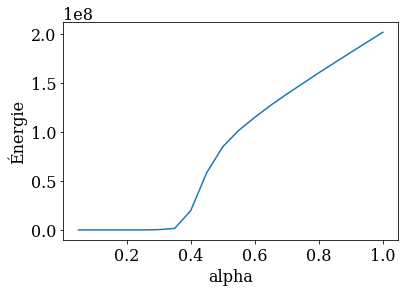

In [107]:
b = [numpy.mean(energy05),numpy.mean(energy1),numpy.mean(energy15),numpy.mean(energy2),numpy.mean(energy25),numpy.mean(energy3),numpy.mean(energy35),numpy.mean(energy4),numpy.mean(energy45),numpy.mean(energy5),numpy.mean(energy55),numpy.mean(energy6),numpy.mean(energy65),numpy.mean(energy7),numpy.mean(energy75),numpy.mean(energy8),numpy.mean(energy85),numpy.mean(energy9),numpy.mean(energy95),numpy.mean(energy10)]
fig = pyplot.figure()
ax=fig.add_subplot(111)
ax.set_xlabel('alpha')
ax.set_ylabel('Énergie')
pyplot.plot(c,b)


#### La valeur critique d'alpha, où la transition de phase a lieu,  est α=0.4.